### Thermal input の指標を計算するときの time step 依存性を確認する。

In [1]:
import sys
sys.path.insert(0, '../')

In [2]:
from main_target import main_target
from jasmine_orbit.GraphOrbit import get_true_segments

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")

In [3]:
import os
os.chdir("../") # for config

In [4]:
args = {
    '-s': False, #春分点を基準
    '-a': True, #秋分点を基準
    '-p':  45., #基準日からの計算開始日(この日を含む)
    '-w':  90., #計算期間(日)
    '-o': None, #グラフ出力
#    '-v': False, #3D画面出力
    '-t': "GJ 486", #target name
#    '-m': 1., #time step in minutes [default: 1]
        }

<>:28: SyntaxWarning: invalid escape sequence '\p'
<>:28: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_552652/706913235.py:28: SyntaxWarning: invalid escape sequence '\p'
  ax1.set_ylabel("Sum of cos$\phi$ during a single orbit")


基準日 2030/09/22 15:00:00 (UTC) 
開始日 2030/11/06 15:00:00 (UTC)
計算時間 90.0 days
衛星高度: 600 km
軌道傾斜角: 97.7876 度
平均運動: 14.89338980 回/日
TLE :
 1 00000U 30001A   30001.50000000  .00000000  00000-0  00000-0 0  9991 
 2 00000 097.7876 191.6240 0000001 000.0000 090.0000 14.89338979995102
GJ 486
     name  JASMINE S/N  Npl_known          ra       dec       elon      elat  \
9  GJ 486         24.0        1.0  191.981531  9.749418  187.11208  13.69483   

    logL  logL_calc      M  Merr1  Merr2  Hwmag    P_in  Perr_in1  Perr_in2  \
9 -1.917     -1.767  0.323  0.015 -0.015  7.125  30.382     0.062     0.062   

    P_out  Perr_out1  Perr_out2  
9  54.393      0.111      0.111  
基準日 2030/09/22 15:00:00 (UTC) 
開始日 2030/11/06 15:00:00 (UTC)
計算時間 90.0 days
衛星高度: 600 km
軌道傾斜角: 97.7876 度
平均運動: 14.89338980 回/日
TLE :
 1 00000U 30001A   30001.50000000  .00000000  00000-0  00000-0 0  9991 
 2 00000 097.7876 191.6240 0000001 000.0000 090.0000 14.89338979995102
GJ 486
     name  JASMINE S/N  Npl_known          r

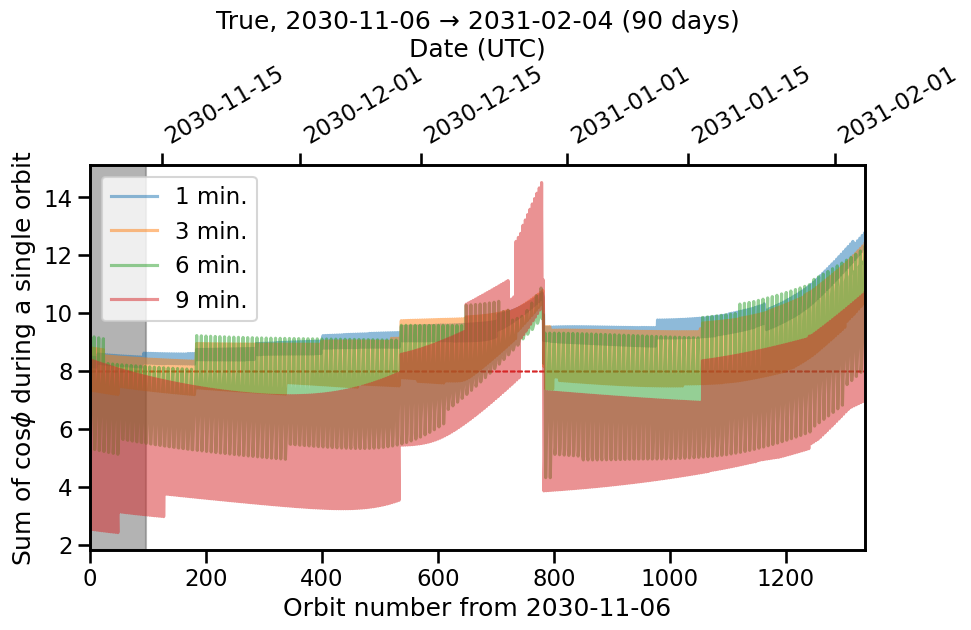

In [ ]:
steps = [1, 3, 6, 9]

fig, ax1 = plt.subplots(figsize=(10,5))
ax2 = ax1.twiny()
for step_tmp in steps[:]:
    args["-m"] = step_tmp
    times, index_an, frac_obs, sum_thermal_input = main_target(args)

    times_an = np.array(times)[index_an[:-1]]
    orbit_num = range(len(times_an))
    time_span = (times[-1] - times[0]).days

    mask_obs_orb = np.array(frac_obs)>0

    
    ax1.plot(orbit_num, sum_thermal_input, '-', label=f"{step_tmp} min.", alpha=0.5)
    ax1.axhline(8, orbit_num[0], orbit_num[-1], ls="dashed", lw=1, color="tab:red", zorder=0)

    for start, end in get_true_segments(~mask_obs_orb):
        ax1.axvspan(start, end, color="grey", alpha=0.2)

    ax2.plot(times_an, sum_thermal_input, '-', alpha=0.)

ax1.legend()
ax1.set_title(f"{args["-a"]}, {times[0].strftime('%Y-%m-%d')} → {times[-1].strftime('%Y-%m-%d')} ({(times[-1] - times[0]).days + 1} days)")
ax1.set_xlabel("Orbit number from {}".format(times[0].strftime("%Y-%m-%d")))
#ax1.set_ylabel("Fraction of thermal unfeasible time\nper orbit")
ax1.set_ylabel("Thermal input during a single orbit")
ax1.set(xlim=(orbit_num[0], orbit_num[-1]))
#ax1.set(ylim=(0,1.))


ax2.set(xlim=(times_an[0], times_an[-1]))
ax2.set(xlabel=f"Date ({str(times[0].tzinfo)})")
plt.setp(ax2.get_xticklabels(), rotation=30, ha="left")

#plt.show()
outfile = "../output/figs/timestep_test.png"
plt.savefig(outfile, bbox_inches="tight")
